In [1]:
 def quickSort(arr,low=None,high=None):
    
    def partition(arr,low,pivot): 
        i = low-1          
        pVal = arr[pivot]      
  
        for j in range(low , pivot): 
            if arr[j] < pVal:  
                i = i+1 
                arr[i],arr[j] = arr[j],arr[i] 
  
        arr[i+1],arr[pivot] = arr[pivot],arr[i+1] 
        return i+1
    
    low = (0 if low is None else low)
    high = (len(arr)-1 if high is None else high)
    
    if low < high: 

        p = partition(arr,low,high) 
        quickSort(arr, low, p-1) 
        quickSort(arr, p+1, high)
        
    return arr

In [2]:
class Heap:
    def __init__(self, key=lambda x:x):
        self.data = []
        self.key  = key

    @staticmethod
    def _parent(idx):
        return (idx-1)//2
        
    @staticmethod
    def _left(idx):
        return idx*2+1

    @staticmethod
    def _right(idx):
        return idx*2+2
    
    def heapify(self, idx=0):
        while True:
            l = Heap._left(idx)
            r = Heap._right(idx)
            maxidx = idx
            if l < len(self) and self.key(self.data[l]) > self.key(self.data[idx]):
                maxidx = l
            if r < len(self) and self.key(self.data[r]) > self.key(self.data[maxidx]):
                maxidx = r
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break
            
    def add(self, x):
        self.data.append(x)
        i = len(self.data) - 1
        p = Heap._parent(i)
        
        while i > 0 and self.key(self.data[p]) < self.key(self.data[i]):
            self.data[i], self.data[p] = self.data[p], self.data[i]
            i = p
            p = Heap._parent(i)
        
    def peek(self):
        return self.data[0]

    def pop(self):
        ret = self.data[0]
        self.data[0] = self.data[len(self.data)-1]
        del self.data[len(self.data)-1]
        self.heapify()
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)
    
def heapSort(arr):
    storage = Heap(lambda x:-x)
    for i in arr:
        storage.add(i)
    lst = []
    while storage:
        lst.append(storage.pop())
    return lst
        

In [3]:
import time
def timeIt(func, data):

    start = ((time.time() * 1000))
    func(data)
    stop = ((time.time() * 1000))
    return (stop-start), len(data)

In [4]:
timeIt(quickSort, [3, 5, 7, 98, 74, 13, 45, 14, 67])

(0.013671875, 9)

In [5]:
import random
def createBatch():
    def genTest(size=100):
        return [random.randint(-9999, 9999)for _ in range(size)]
    return [genTest(size) for size in range(0, 100000, 10000)]
    

In [6]:
import matplotlib.pyplot as plt
hTimes = []
hLens = []
qTimes = []
qLens = []
for test in createBatch():
    timeH, lenH = (timeIt(heapSort, test))
    hTimes.append(timeH)
    hLens.append(lenH)
    timeQ, lenQ = (timeIt(quickSort, test))
    qTimes.append(timeQ)
    qLens.append(lenQ)

    

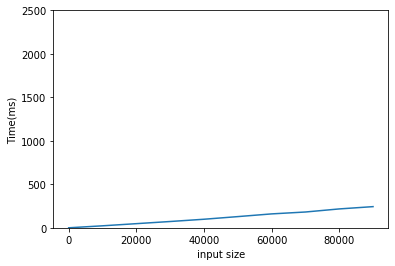

In [14]:
plt.close()
plt.ylim(0, 2500)
plt.xlabel("input size")
plt.ylabel("Time(ms)")
plt.plot(qLens, qTimes)


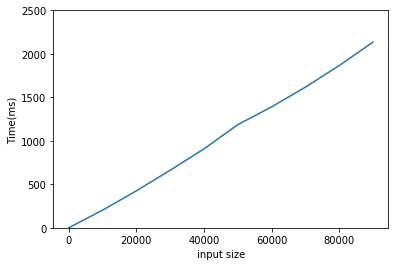

In [15]:
plt.close()
plt.ylim(0, 2500)
plt.xlabel("input size")
plt.ylabel("Time(ms)")
plt.plot(hLens, hTimes)